In [3]:
import os, glob
import pandas as pd
import matplotlib.pyplot as plt

def get_metrics_files(logs_root, backbones):
    metrics_files = {}
    for backbone in backbones:
        log_root = os.path.join(logs_root, backbone)
        versions = glob.glob(os.path.join(log_root, 'version_*'))
        for version_pth in versions:
            version = version_pth.split('_')[1]
            metrics_files.update({version_pth: [backbone, version]})
    return metrics_files

def draw_backbone_comparision_plot(
    metric_files,
    y_metric,
    x_metric = 'epoch',
    title = None
):
    plt.figure()
    for file in metric_files.items():
        metric_file = os.path.join(file[0], f'metrics_{file[1][0]}.csv')
        if os.path.exists(metric_file):
            metrics = pd.read_csv(metric_file)
            plt.plot(metrics[x_metric], metrics[y_metric], label=f'{file[1][0]}_{file[1][1]}')

    plt.title(title)
    plt.xlabel(x_metric)
    plt.ylabel(y_metric)
    plt.legend()
    plt.tight_layout()
    plt.show()

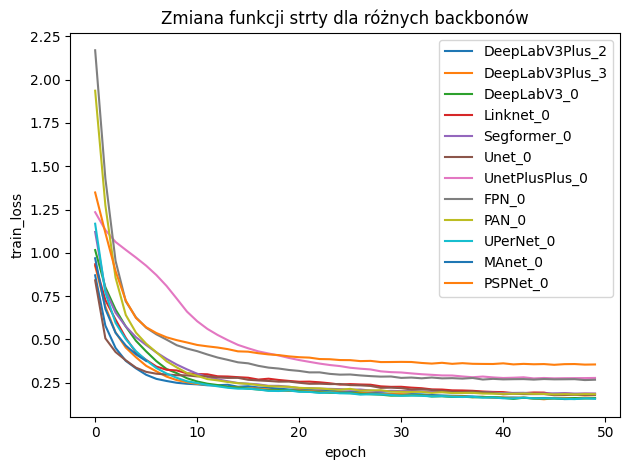

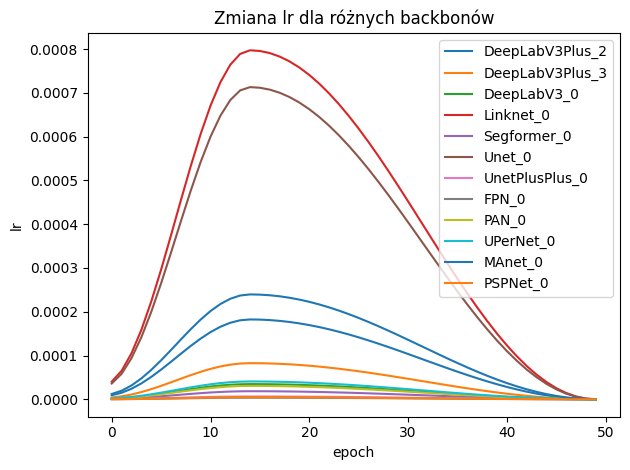

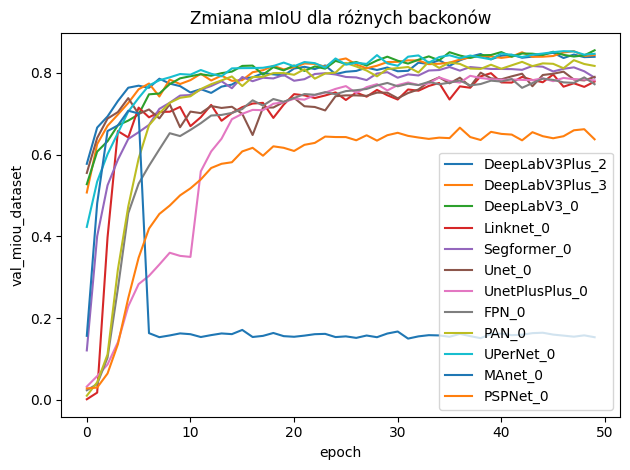

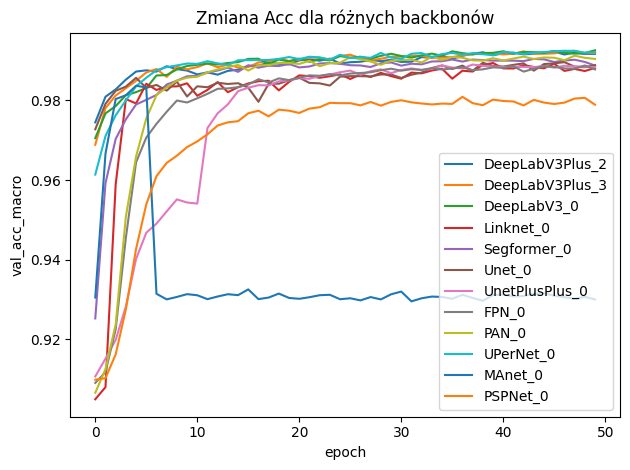

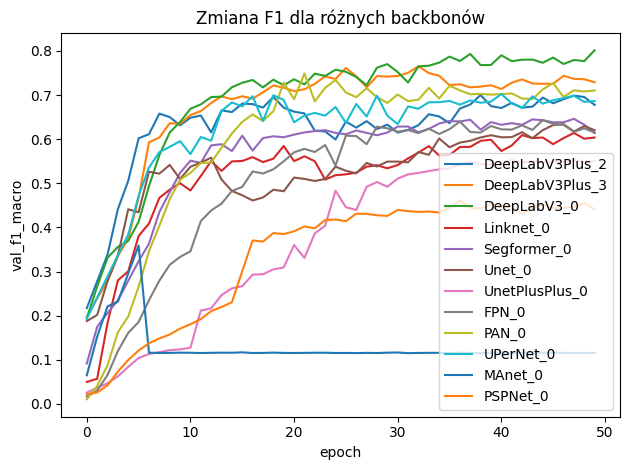

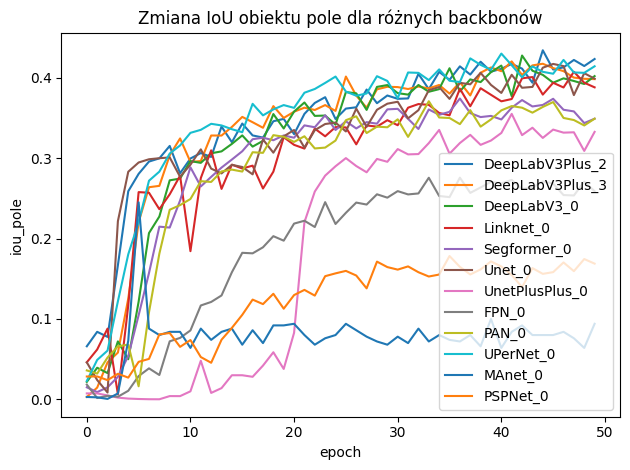

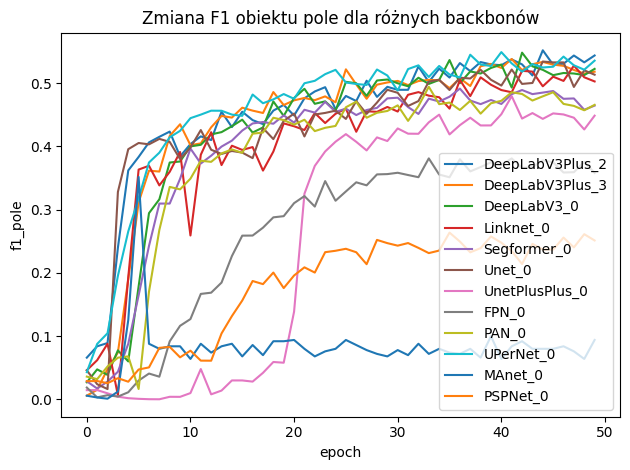

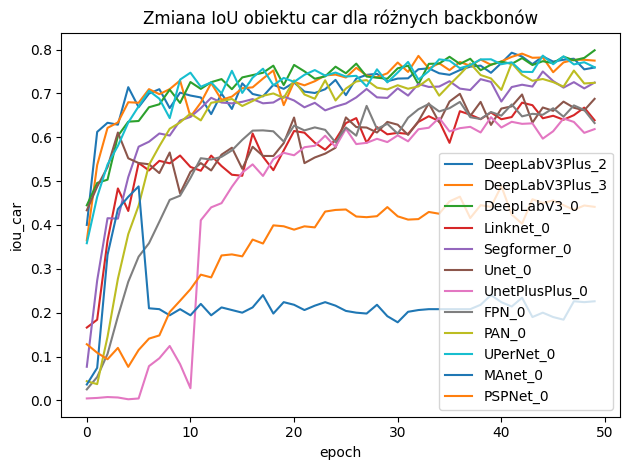

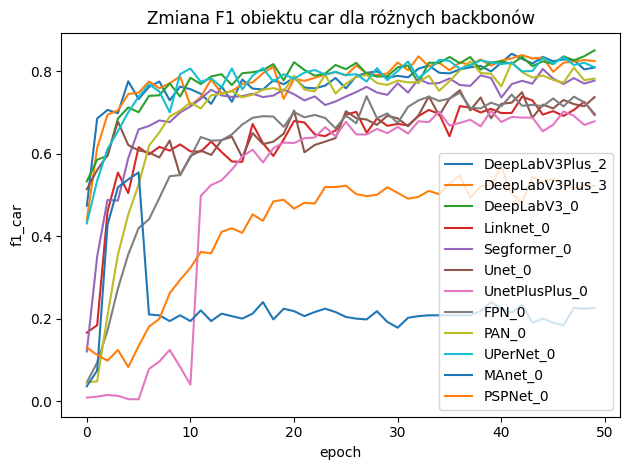

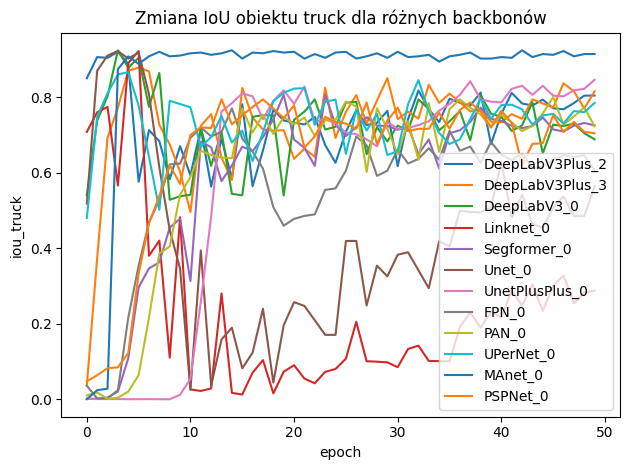

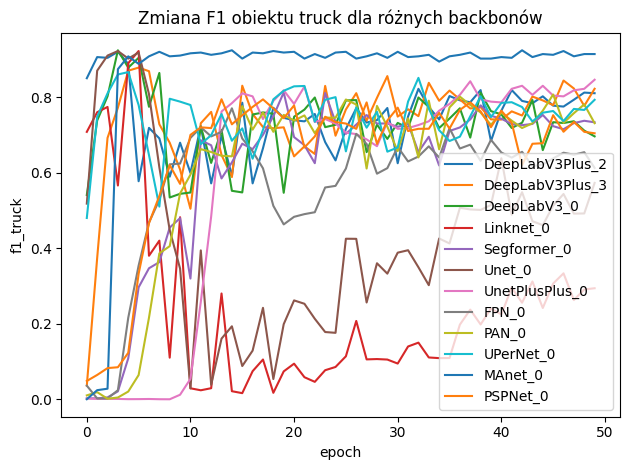

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

logs_root = ".\\logs"
backbones = [
    'DeepLabV3Plus', 'DeepLabV3', 'Linknet', 'Segformer', 'Unet', 'UnetPlusPlus', 'FPN', 'PAN', 'UPerNet', 'DPT', 'MAnet', 'PSPNet'
    ]

# backbones = ['DeepLabV3Plus']

comparision_metrics = [
    ['Zmiana funkcji strty dla różnych backbonów', 'train_loss'],
    ['Zmiana lr dla różnych backbonów', 'lr'],
    ['Zmiana mIoU dla różnych backonów', 'val_miou_dataset'],
    ['Zmiana Acc dla różnych backbonów', 'val_acc_macro'],
    ['Zmiana F1 dla różnych backbonów', 'val_f1_macro'],
    ['Zmiana IoU obiektu pole dla różnych backbonów', 'iou_pole'],
    ['Zmiana F1 obiektu pole dla różnych backbonów', 'f1_pole'],
    ['Zmiana IoU obiektu car dla różnych backbonów', 'iou_car'],
    ['Zmiana F1 obiektu car dla różnych backbonów', 'f1_car'],
    ['Zmiana IoU obiektu truck dla różnych backbonów', 'iou_truck'],
    ['Zmiana F1 obiektu truck dla różnych backbonów', 'f1_truck']
]

for metrics in comparision_metrics:
    draw_backbone_comparision_plot(
        title=metrics[0],
        y_metric=metrics[1],
        metric_files=get_metrics_files(logs_root, backbones)
)